# Chocolate at a Glance:
<b>Chocolate</b> is an all time favorite sweet for a sizeable portion of the world.  It comes from the combination of several ingredients mixed with <b>cacao seeds</b>, and can be found in liquid, paste, or block/bar form.  In this report we'll be taking a look at data gathered through nearly 1,800 expert ratings of chocolate bars, and form a few hypothesis based on factors and values!

In [3]:
#IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sb

In [4]:
# Connect to database:
conn = sqlite3.connect('chocolateBars.db')
# Read the data:
chocolateBars = pd.read_csv('flavors_of_cacao_ADJUSTED.csv')
# Populate chocolateBars database:
chocolateBars.to_sql('chocolateBars', conn, if_exists = 'replace')
# While we're at it, let's make a variable that we'll use to read the queries:
read = pd.read_sql_query

Let's look at our factors and values in an example:

In [5]:
read("""
    SELECT * FROM chocolateBars
    LIMIT 1;
""", conn)

,index,Company,Bar_Name,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Bean_Origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,None,Sao Tome


Mostly we'll take note of company names/location, the cocoa percentage, the rating, bean type, and the origin.  

# Rating Guide

Just like wine, chocolate has "professional tasters".  The taste tests are based off flavor, texture, aftermelt, and overall <b>opinion</b>.  Make sure you understand that the ratings are purely subjective, thus the rating would most likely be inconsistant with a different group of tasters.

Here directly from the source's website is an explaination of each rounded rating:
    <ul>5= Elite (Transcending beyond the ordinary limits)</ul>
    <ul>4= Premium (Superior flavor development, character and style)</ul>
    <ul>3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)</ul>
    <ul>2= Disappointing (Passable but contains at least one significant flaw)</ul>
    <ul>1= Unpleasant (mostly unpalatable)</ul>

  # Questions!
  
  

#### <ul><i>Where is the best place to farm sought after beans?</i></ul>
    
#### <ul><i>What cocoa percentage is the right amount?</i></ul>    
    
#### <ul><i>Best of all, which company that holds the highest ratings!?</i></ul>
    

There are a lot of questions that we could ask while assessing this data, however we will cover these three in this report.

# Bean Origin VS. Rating

Surely the chocolate with the highest satifaction comes from well grown cocoa trees!  The soil contents, pH levels (6 is ideal), and the depth of the soil are important to a healthy cacao tree.  These qualities vary for different areas very often, so knowing where they were grown is key.

In [6]:
origin_count = ([read("""
    SELECT DISTINCT bean_origin FROM chocolateBars;
""", conn)])
for i in origin_count:
    print("There are " + str(len(i)) + " unique areas listed in the 1,795 ratings (one being a blank spot for all the unkown locations).")

There are 101 unique areas listed in the 1,795 ratings (one being a blank spot for all the unkown locations).


In [7]:
nulled = ([read("""
    SELECT * FROM chocolateBars
    WHERE bean_origin LIKE '_';
""", conn)])
for i in nulled:
    print("There are " + str(len(i)) + " empty origins in the dataset.  This should not heavily affect our findings.")

There are 73 empty origins in the dataset.  This should not heavily affect our findings.


Our plot will show us the country names, and the amount of four or higher star ratings it has.  This will most likely indicate which country grows the best beans.

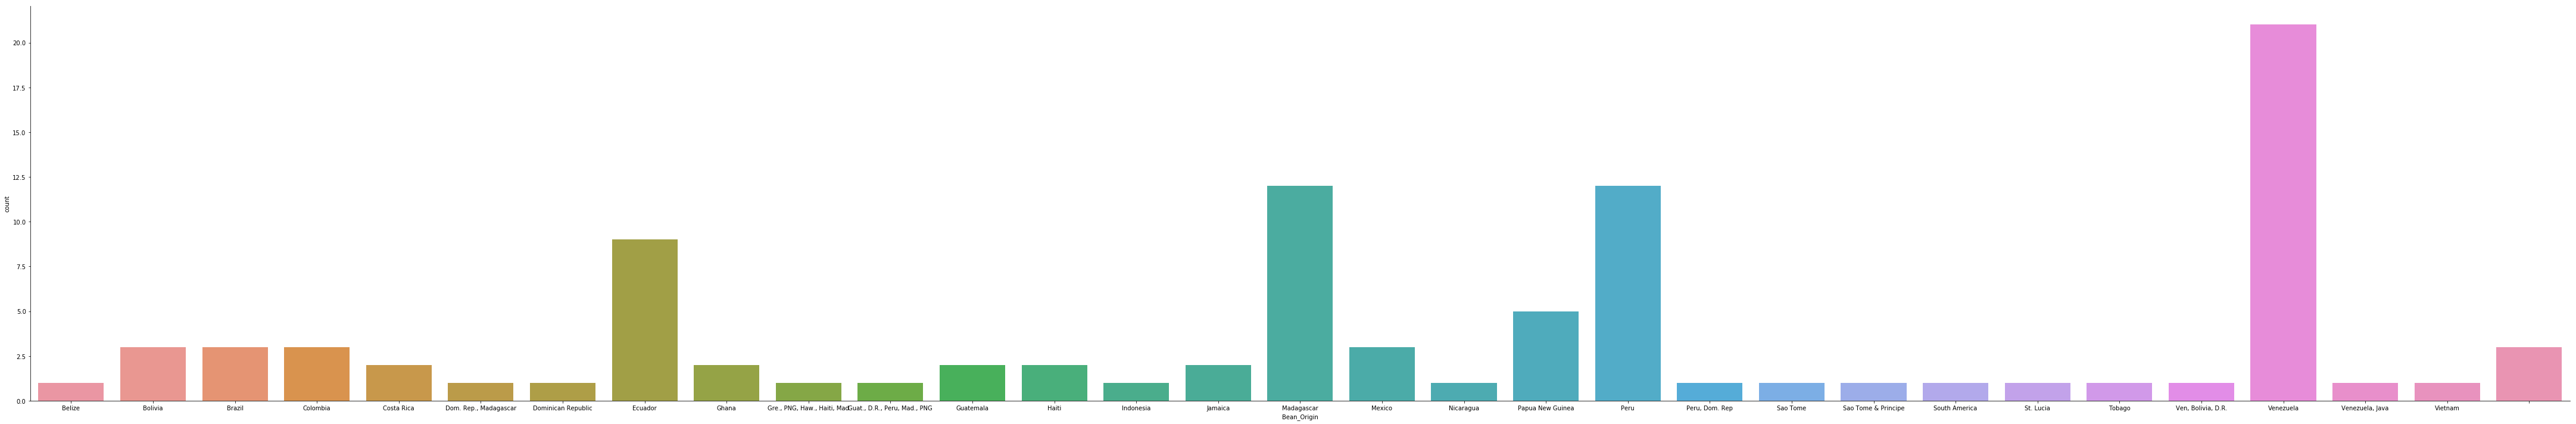

In [8]:
ratings = pd.read_sql_query("""
    SELECT Bean_Origin FROM chocolateBars
    WHERE Rating >= 4
    ORDER BY Bean_Origin;
""", conn)
catplot = sb.catplot(
    x = "Bean_Origin",
    data= ratings,
    kind = "count",
    height= 10,
    aspect= 6
)

# Cocoa Percentage VS. Rating

How much cocoa is too much?  Many would say there is no such thing, but let's see if we can evaluate this in a similar fashion to the formula we used to find our last conclusion.

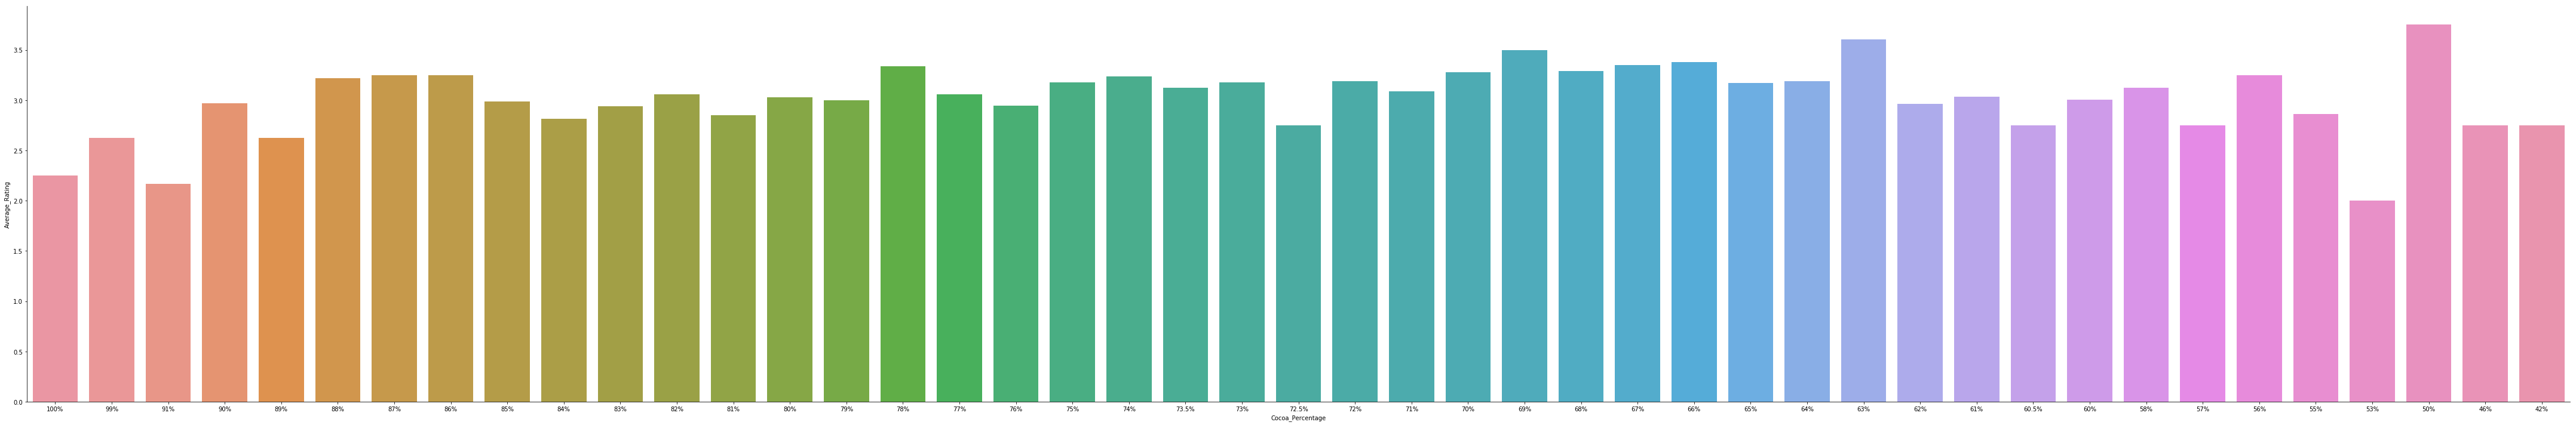

In [9]:
percents = read("""
    SELECT Cocoa_Percentage, AVG(Rating) as Average_Rating 
    FROM chocolateBars 
    Group By cocoa_percentage
    ORDER BY Cocoa_Percentage / 100 DESC;
""",conn)

catplot = sb.catplot(
    x = 'Cocoa_Percentage',
    y = 'Average_Rating',
    data= percents,
    kind= 'bar',
    height= 10,
    aspect= 6
)

Wow!  Pretty AND suprising data.  It seems it that there are not huge changes in average rating per indivdual percentage.  For example: 50% is the highested rated,
         53% is the lowest rated,
         55% has a is ranked higher than 53% by nearly one whole integer.
This leads me to believe that cocoa percentage is not as important to the process as the manufacturing/added product.  We are also lumping high ranked growers like Venezuela with low ranked growers in Indonesia so that could skew data.

# You guessed it!  Highest ranked company!

Let's take one last attempt at finding peace with our data.  I want to find the company name and location of all the companies with higher ratings.

In [38]:
read("""
    SELECT Company, Company_Location, AVG(Rating) as Average_Rating, COUNT(Rating) as Total_Ratings
    FROM chocolateBars 
    GROUP BY Company
    HAVING Average_Rating >= 3.775
    ORDER BY Average_Rating DESC;
""", conn)




,Company,Company_Location,Average_Rating,Total_Ratings
0,Tobago Estate (Pralus),France,4.000000,1
1,Heirloom Cacao Preservation (Zokoko),U.S.A.,3.875000,2
2,Ocelot,Scotland,3.875000,2
3,Amedei,Italy,3.846154,13
4,Matale,Australia,3.812500,4
5,Patric,U.S.A.,3.791667,6
6,Idilio (Felchlin),Switzerland,3.775000,10


Well we did it!  Here are the top six companies and their location.  However, we now know that the top company
might be the highest ranked simply because there is only one review.  One review is not enough opinions to form valuable data.

Let's clean up our query and make sure the number of reviews is greater than or four so we can have a more accurate understanding.  The reason I used four is because there are roughly 

In [49]:
read("""
    SELECT Company, Company_Location, AVG(Rating) as Average_Rating, COUNT(Rating) as Total_Ratings
    FROM chocolateBars 
    GROUP BY Company
    HAVING Average_Rating >= 3.775 AND Total_Ratings >= 4
    ORDER BY Average_Rating DESC;
""", conn)



,Company,Company_Location,Average_Rating,Total_Ratings
0,Amedei,Italy,3.846154,13
1,Matale,Australia,3.812500,4
2,Patric,U.S.A.,3.791667,6
3,Idilio (Felchlin),Switzerland,3.775000,10


Here's a more realistic result.  You can now crown you winner, Amedei.  
Visit them <a title = "https://www.amedei.it/en/">here</a> to try it out for yourself!

# Conclusion

We've found our answers, and our analysis is over.  In summary, we learned:
<ul><b>Venezuela either grows the best cocoa beans or works with higher selling companies.</b></ul>
<ul><b>Cocoa percentage doesn't necessarliy correlate with ratings.</b></ul>
<ul><b>Amedei is the highest ranked company with an average of 3.84/5 with 13 reviews.</b></ul>
Congratulations, you're one step closer to mastering the knowledge of Chocolate related data.  Until next time!